In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

from statistics import mean, stdev
from math import sqrt
from neuroCombat import neuroCombat
# from sklearn.linear_model import LinearRegression

sns.set_theme(context="talk")
pal = sns.color_palette()

In [7]:
param = 'Height'
file = '/home/local/VANDERBILT/dolel/Documents/rsHRF_project/output/WM_GM_analysis/csv_all_infos/' + param +'.csv'

df = pd.read_csv(file)

# df = df.loc[ df['TR'] ==3]
df = df.dropna()
df = df.rename(columns={"Modele": "Model"})


# df['Modele'].hist()
# df["Mean_Brain"] = df[["GM", "WM"]].mean(axis=1)

# df.loc[df['Experiment'] == 'VUIISXNAT03_E230692', 'Experiment'] = 'VUIISXNAT04_E230692'
# df['Experiment'] = df.Experiment.map(lambda x: int(x.lstrip('VUIISXNAT04_E').rstrip('aAbBcC')))

# df_clean = df.copy()
# df_clean, _ = remove_outlier(df, 'Mean_Brain')

# file = '/home/local/VANDERBILT/dolel/Documents/rsHRF_project/output/WM_GM_analysis/csv_cleaned/meanbrain_' + param +'_cleaned.csv'
# df_clean.to_csv(file, index=False)

In [ ]:
param = 'DipHeight'
file = '/home/local/VANDERBILT/dolel/Documents/rsHRF_project/output/WM_GM_analysis/csv_cleaned/meanbrain_' + param +'_cleaned.csv'
df = pd.read_csv(file)

In [4]:
def linear_model(b0, coeff, value):
  return b0 + np.matmul(coeff, value)
  
def remove_outlier(df, index):
    Q1 = df[index].quantile(0.25)
    Q3 = df[index].quantile(0.75)

    IQR = Q3 - Q1

    filter = (df[index] >= Q1 - 1.5*IQR) &  (df[index] <= Q3 + 1.5*IQR)
    outlier =  (df[index] <= Q1 - 1.5*IQR) |  (df[index] >= Q3 + 1.5*IQR)

    return df.loc[filter], df.loc[outlier]


def clean_dataframe(df, index):
  df = df[(df != 0).all(1)]
  df = df.dropna()

  df_inliers, df_outlier = remove_outlier(df, index)
  # if feature == 'FWHM':
  #   df_inliers = df_inliers.loc[df_inliers[index] > 6.5]

  # if feature == 'Time2peak':
  #   df_inliers = df_inliers.loc[df_inliers[index] > 8]

  # if feature == 'Time2dip':
  #   df_inliers = df_inliers.loc[df_inliers[index] > 3]

  return df_inliers, df_outlier

def custom_round(x, base=5):
    return int(base * round(float(x)/base))

def cohens_d(c0, c1):
  std_diff = sqrt((stdev(c0) ** 2 + stdev(c1) ** 2) / 2)
  return (mean(c0) - mean(c1)) / std_diff

## GM and WM plot

In [49]:
n_feature=7
n_roi = 2
pval=  0.05/(n_feature * n_roi)

Text(0.5, 0.98, 'Distribution of scanners across manufacturers')

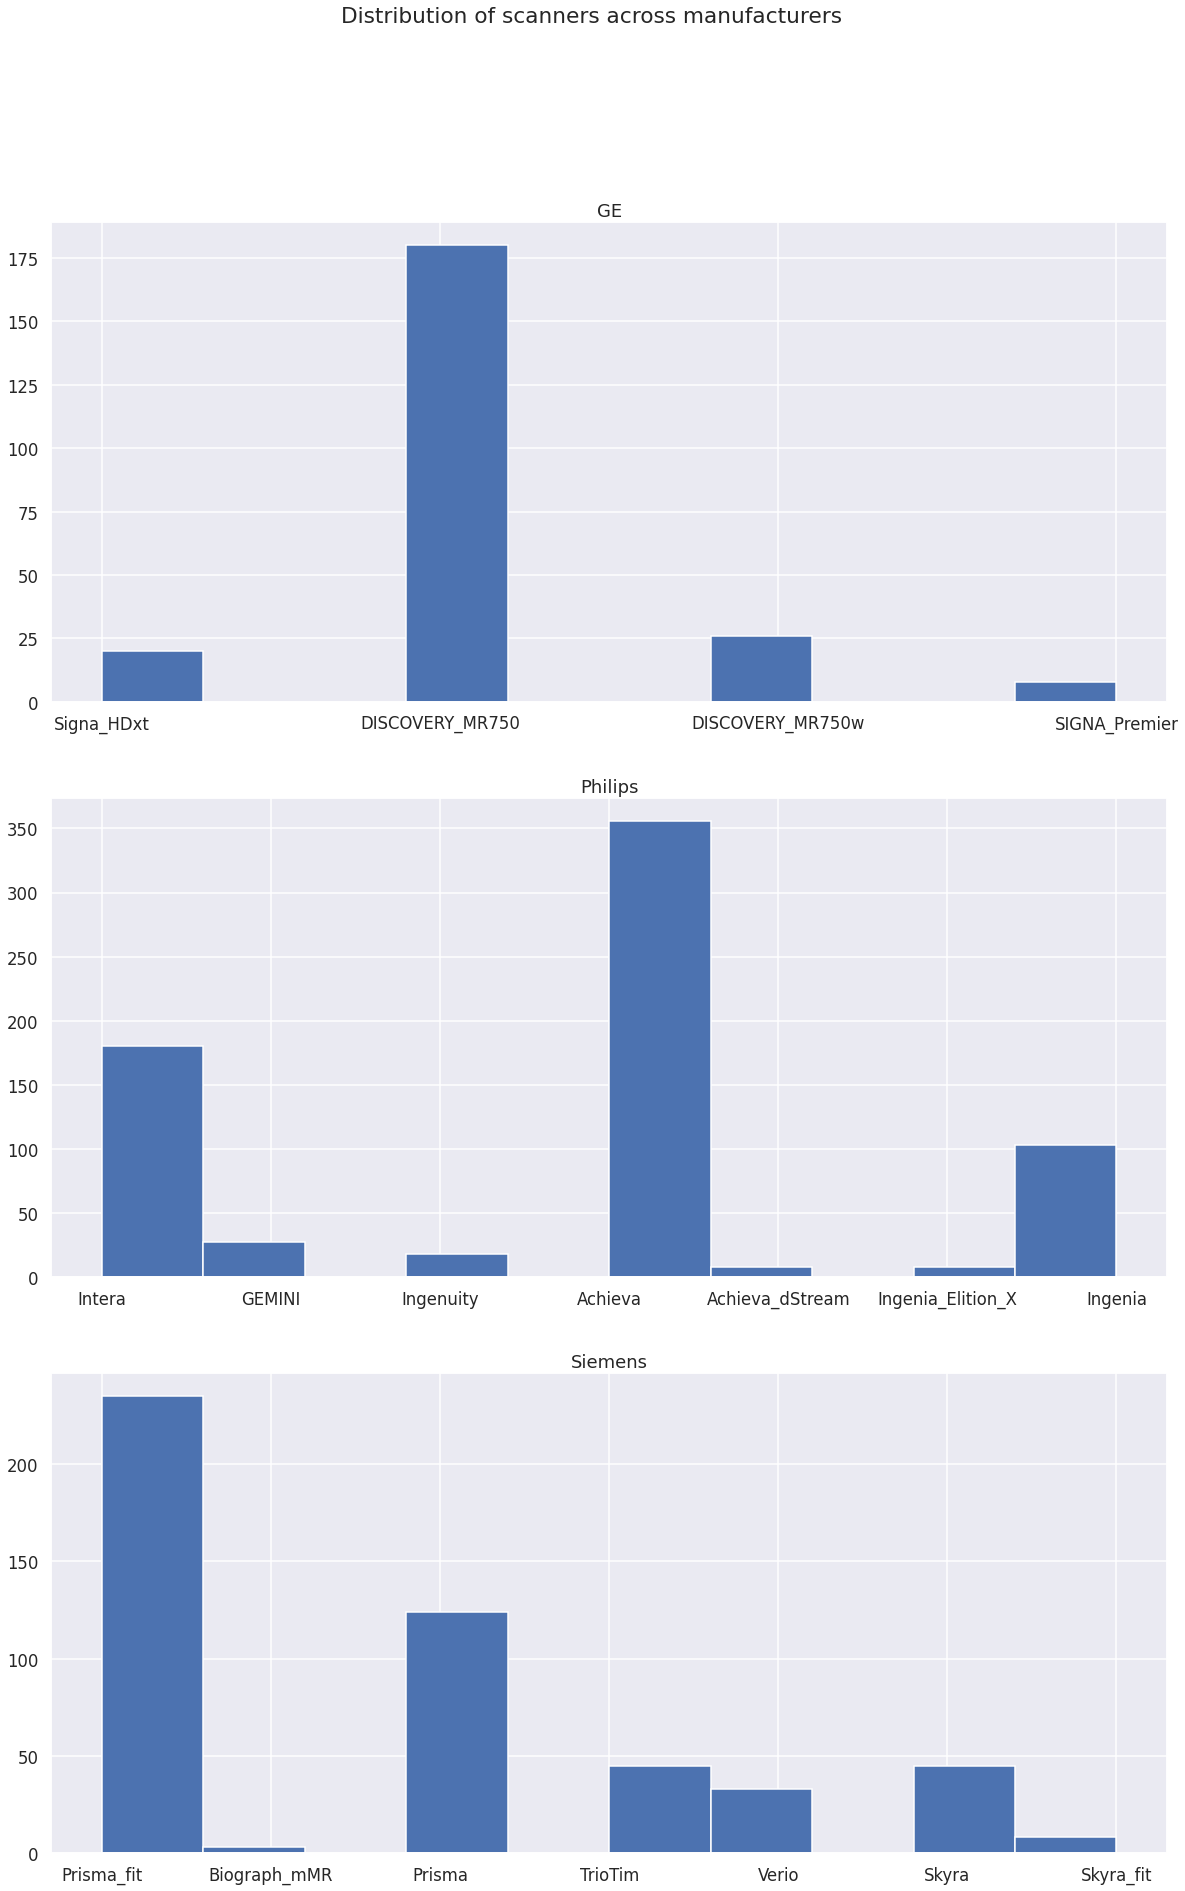

In [12]:
plt.figure(figsize=(20,30))

plt.subplot(3,1,1)
df1 = df.loc[df['Manufacturer'] == 'GE']
df1['Model'].hist()
# plt.axis([50, 100, BI, BF])
# plt.xlabel("age")
# plt.ylabel("PeakIntegral")
plt.title("GE")

plt.subplot(3,1,2)
df1 = df.loc[df['Manufacturer'] == 'Philips']
df1['Model'].hist()
# df_tmp, df_out = clean_dataframe(df_clean, 'PeakIntegral','WM')
# ax = sns.regplot(x="Age", y='WM', data=df_tmp, fit_reg=False)
# plt.axis([50, 100, BI, BF])
# plt.xlabel("age")
# plt.ylabel("PeakIntegral")
plt.title("Philips")

plt.subplot(3,1,3)
df1 = df.loc[df['Manufacturer'] == 'Siemens']
df1['Model'].hist()
# ax = sns.regplot(x="Age", y='WM', data=df_out, fit_reg=False, color='red')
# plt.axis([50, 100, BI, BF])
# plt.xlabel("age")
# plt.ylabel("PeakIntegral")
plt.title("Siemens")

plt.suptitle('Distribution of scanners across manufacturers')


In [52]:


df, out = remove_outlier(df, 'White_Matter')
df['Sex'] = df['Sex'].map({'F': 1, 'M': 0})
# create linear regression object
mlr = LinearRegression()

# fit linear regression
mlr.fit(df[['Age', 'Sex', 'Weight']], df['White_Matter'])

# get the slope and intercept of the line best fit.
b0 = mlr.intercept_
# -244.92350252069903

beta_coeff = mlr.coef_
print(b0)
print(beta_coeff)
# [ 5.97694123 19.37771052]

3.3308855205526395
[0.01129361 0.09049965 0.00171961]


### scanner effect  plot and pearson

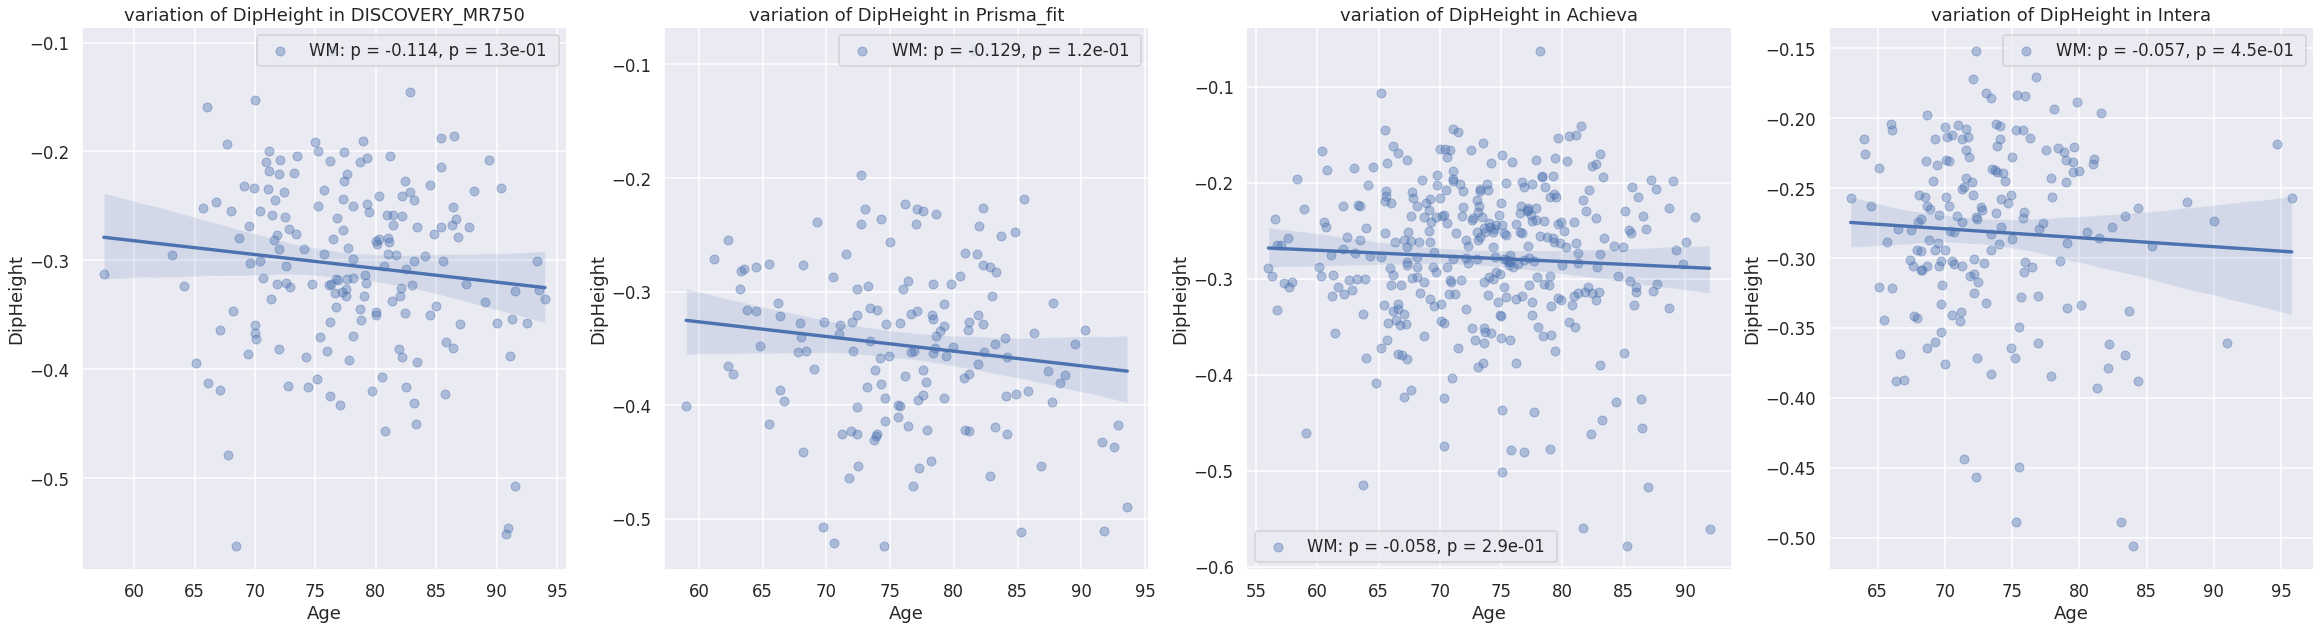

In [781]:
plt.figure(figsize=(40,10))

## -------- DISCOVERY_MR750 -------- ##
plt.subplot(1,4,1)
r, p = np.round(stats.pearsonr(df_GE['Age'], df_GE['WM']), decimals=5)
legend = "WM: p = {:.3f}, p = {:.1e} ".format(r, p)
sns.regplot(x="Age", y='WM', data=df_GE, scatter_kws={'alpha':0.4}, label=legend)

tit = "variation of {} in {}".format(param, 'DISCOVERY_MR750')
plt.title(tit)
plt.xlabel("Age")
plt.ylabel(param)
plt.legend()


## -------- Prisma_fit -------- ##
plt.subplot(1,4,2)
r, p = np.round(stats.pearsonr(df_Siemens['Age'], df_Siemens['WM']), decimals=5)
legend = "WM: p = {:.3f}, p = {:.1e} ".format(r, p)
sns.regplot(x="Age", y='WM', data=df_Siemens, scatter_kws={'alpha':0.4}, label=legend)

tit = "variation of {} in {}".format(param, 'Prisma_fit')
plt.title(tit)
plt.xlabel("Age")
plt.ylabel(param)
plt.legend()


## -------- Achieva -------- ##
plt.subplot(1,4,3)
r, p = np.round(stats.pearsonr(df_Philips_A['Age'], df_Philips_A['WM']), decimals=5)
legend = "WM: p = {:.3f}, p = {:.1e} ".format(r, p)
sns.regplot(x="Age", y='WM', data=df_Philips_A, scatter_kws={'alpha':0.4}, label=legend)

tit = "variation of {} in {}".format(param, 'Achieva')
plt.title(tit)
plt.xlabel("Age")
plt.ylabel(param)
plt.legend()

## -------- Intera -------- ##
plt.subplot(1,4,4)
r, p = np.round(stats.pearsonr(df_Philips_I['Age'], df_Philips_I['WM']), decimals=5)
legend = "WM: p = {:.3f}, p = {:.1e} ".format(r, p)
sns.regplot(x="Age", y='WM', data=df_Philips_I, scatter_kws={'alpha':0.4}, label=legend)

tit = "variation of {} in {}".format(param, 'Intera')
plt.title(tit)
plt.xlabel("Age")
plt.ylabel(param)
plt.legend()

1.2369124395604396 1.4089496153846155
-0.5052897724830788
1.501465813559322 1.3996264285714286
0.21877499401998046
1.0733251253481895 1.043858
0.19481339946078002


<Figure size 1440x720 with 0 Axes>

In [200]:
df_clean, _ = clean_dataframe(df, 'Height', 'WM')
df_clean

,Unnamed: 0,Subject,Experiment,GM,WM,Manufacturer,Modele,TR,Age,Study,Sex,Weight
1,1,VUIISXNAT04_S16962,VUIISXNAT04_E231331,1.1562,0.93051,Philips,Intera,3.001,90.0,ADNI 2,M,73.0
2,2,VUIISXNAT04_S16963,VUIISXNAT04_E230872,1.1939,0.86320,Philips,Intera,3.000,81.5,ADNI 2,F,57.6
3,3,VUIISXNAT04_S16963,VUIISXNAT04_E230896,1.3614,1.10530,Siemens,Prisma_fit,3.000,81.5,ADNI 2,F,57.6
4,4,VUIISXNAT04_S16963,VUIISXNAT04_E231332,1.3628,1.03900,Philips,Intera,3.001,81.5,ADNI 2,F,57.6
5,5,VUIISXNAT04_S16963,VUIISXNAT04_E231466,1.4196,1.04980,Philips,Intera,3.001,81.5,ADNI 2,F,57.6
...,...,...,...,...,...,...,...,...,...,...,...,...
1437,1437,VUIISXNAT04_S17761,VUIISXNAT04_E232780,1.5965,1.40980,Siemens,TrioTim,3.000,67.9,ADNI 3,F,47.6
1438,1438,VUIISXNAT04_S17762,VUIISXNAT04_E232781,1.7974,1.70060,Siemens,TrioTim,3.000,71.6,ADNI 3,F,72.6
1439,1439,VUIISXNAT04_S17763,VUIISXNAT04_E232786,1.4196,1.22340,Philips,Ingenia,3.000,76.9,ADNI 3,F,52.0
1441,1441,VUIISXNAT04_S17765,VUIISXNAT04_E232791,1.7930,1.29690,GE,DISCOVERY_MR750,3.000,80.0,ADNI 3,M,89.8


In [674]:
# df_inf_65 = df.loc[ df['Age'] <= 65]
# df_65_70 = df.loc[ (df['Age'] >65) & (df['Age'] <= 70)]
# df_70_75 = df.loc[ (df['Age'] >70) & (df['Age'] <= 75)]
# df_75_80 = df.loc[ (df['Age'] >75) & (df['Age'] <= 80)]
# df_sup_80 = df.loc[ df['Age'] >80]

In [675]:
# plt.figure(figsize=(50,10))
# plt.subplot(1,5,1)
# df_inf_65['Manufacturer'].hist()
# plt.subplot(1,5,2)
# df_65_70['Manufacturer'].hist()
# plt.subplot(1,5,3)
# df_70_75['Manufacturer'].hist()
# plt.subplot(1,5,4)
# df_75_80['Manufacturer'].hist()
# plt.subplot(1,5,5)
# df_sup_80['Manufacturer'].hist()

In [173]:
plt.figure(figsize=(20,10))
constru =  ['GE', 'Philips', 'Siemens']
j = 0
# list_index=[2, 6, 10, 13, 19, 20, 21, 42, 44, 45, 46]
list_index = [ 7, 17]
for i in list_index:
    j = j + 1
    
    pref = "ROI_"+str(i)
    df["Mean_" + pref] = df[[pref + "_L", pref + "_R"]].mean(axis=1)
    df_tmp, _ = remove_outlier(df, "Mean_" + pref)
    
# print(cohens_d(df_Siemens_f['WM'], df_Siemens['WM']))
# print(cohens_d(df_Philips_A['WM'], df_Philips_I['WM']))
    df_tmp = df_tmp.loc[df_tmp['Modele']=='Prisma_fit']

    df_tmp = df_tmp.loc[df_tmp['Sex']=='M']

    plt.subplot(1,2,j)
    name = 'ROI_' + str(i) + '_L'
    sns.regplot(x="Age", y=name,  data=df_tmp, color=pal[0], label='Left')

    name = 'ROI_' + str(i) + '_R'
    sns.regplot(x="Age", y=name,  data=df_tmp, color=pal[2], label='Right')

    plt.xlabel("Age")
    plt.ylabel("Height")
    tit = 'ROI ' + str(i) + " - Siemens: Prisma_fit"
    plt.title(tit)
    plt.legend()


KeyError: "None of [Index(['ROI_7_L', 'ROI_7_R'], dtype='object')] are in the [columns]"

<Figure size 1440x720 with 0 Axes>

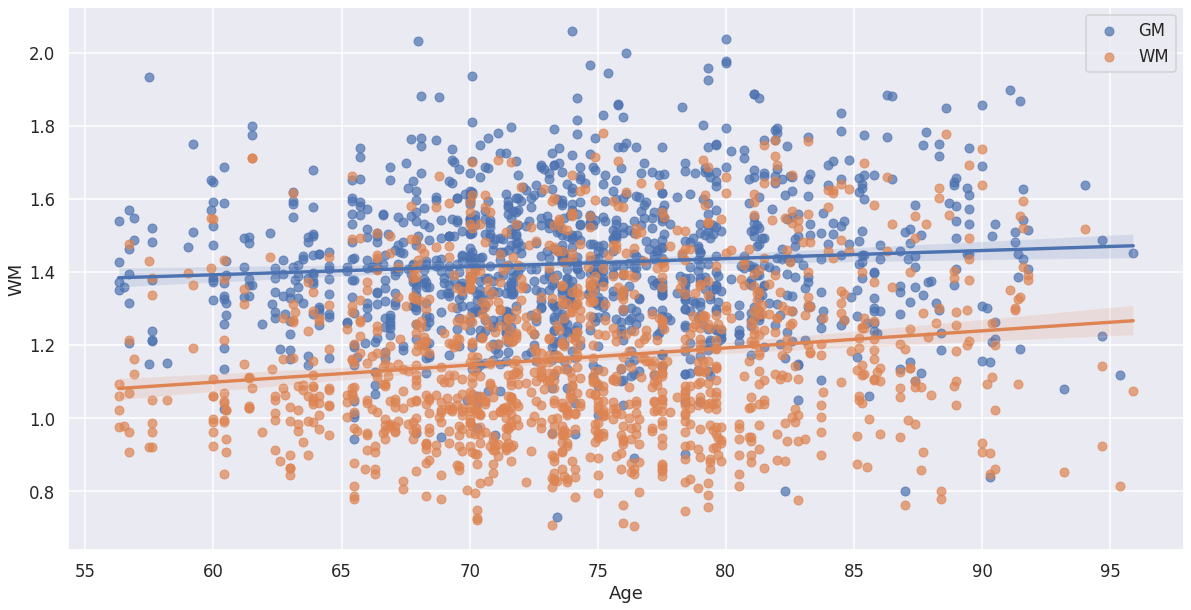

In [49]:
plt.figure(figsize=(20,10))
sns.regplot(x="Age", y='GM', data=df, scatter_kws={'alpha':0.7}, color=pal[0], label='GM')
sns.regplot(x="Age", y='WM', data=df, scatter_kws={'alpha':0.7}, color=pal[1], label='WM')
plt.legend()

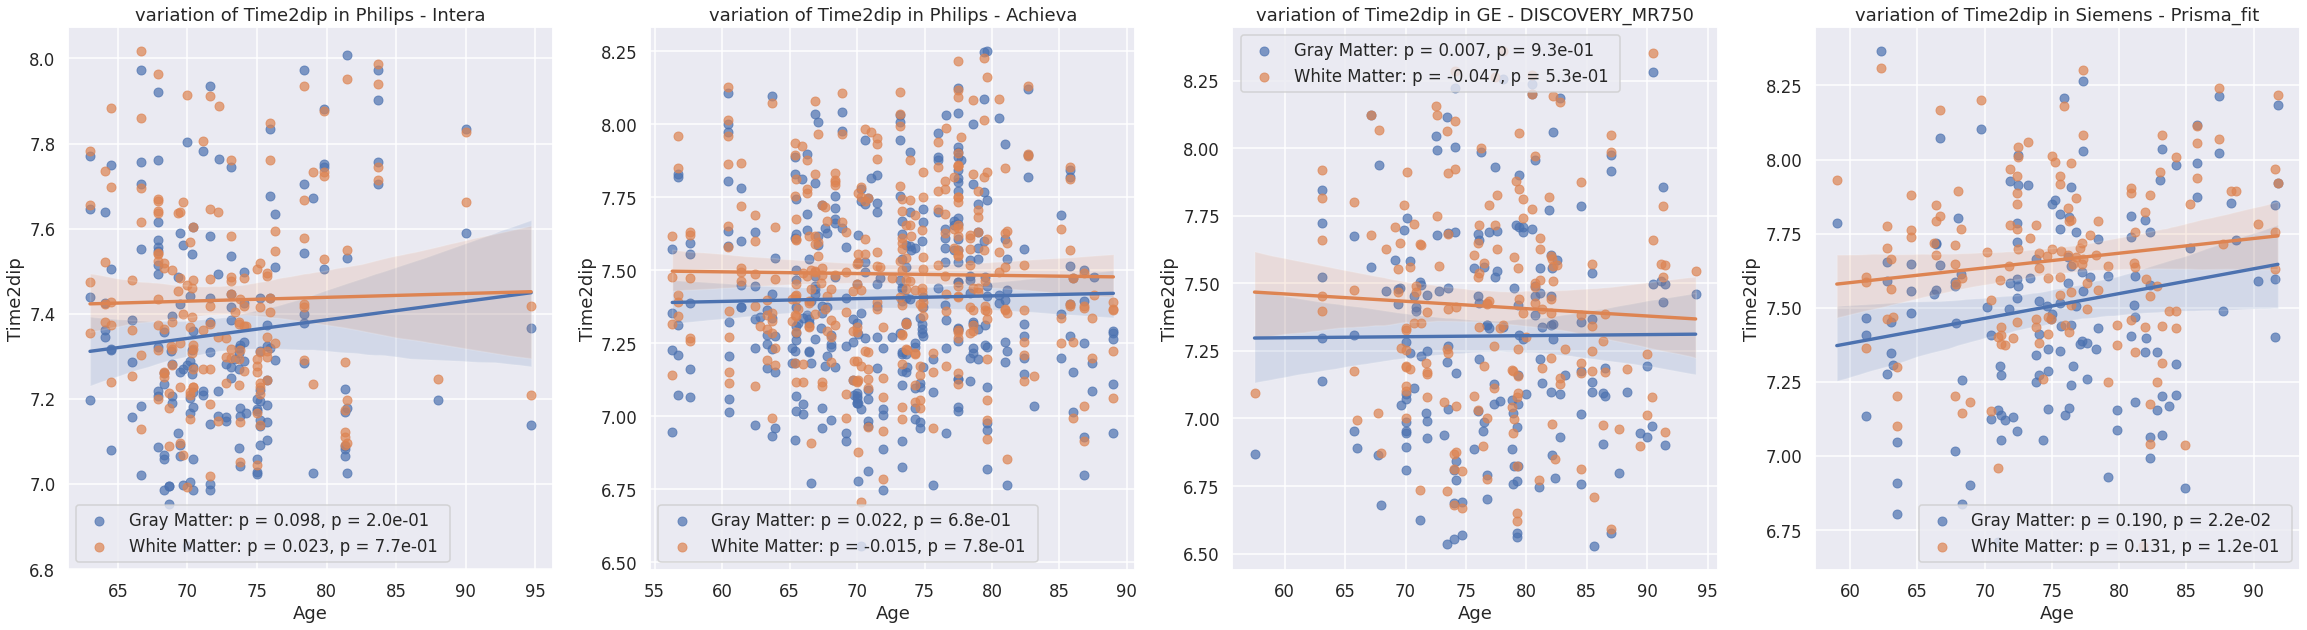

In [65]:
plt.figure(figsize=(40,10))

scanners = ['Intera', 'Achieva', 'DISCOVERY_MR750', 'Prisma_fit']
# scanners = ['DISCOVERY_MR750','DISCOVERY_MR750w', 'Signa_HDxt']

for i in range(len(scanners)):

    plt.subplot(1,4, i+1)
    df_tmp = df.loc[df['Modele']==scanners[i]]
    df_gm, _ = remove_outlier(df_tmp, 'WM')
    df_wm, _ = remove_outlier(df_tmp, 'GM')


    r_gm, p_gm = np.round(stats.pearsonr(df_gm['Age'], df_gm['GM']), decimals=5)
    r_wm, p_wm = np.round(stats.pearsonr(df_wm['Age'], df_wm['WM']), decimals=5)

    legend_gm = "Gray Matter: p = {:.3f}, p = {:.1e} ".format(r_gm, p_gm)
    legend_wm = "White Matter: p = {:.3f}, p = {:.1e} ".format(r_wm, p_wm)


    line2 = sns.regplot(x="Age", y='GM', data=df_gm, scatter_kws={'alpha':0.7}, label=legend_gm)
    line2 = sns.regplot(x="Age", y='WM', data=df_wm, scatter_kws={'alpha':0.7}, label=legend_wm)
    plt.legend()

    if i ==2 :
        constru='GE'
    elif i < 2:
        constru='Philips'
    else:
        constru='Siemens'

    plt.xlabel("Age")
    plt.ylabel(param)
    tit = "variation of {} in {} - {}".format(param, constru, scanners[i])
    plt.title(tit)

In [798]:
### fit scipy linear model to have better regression

# plt.figure(figsize=(10,10))

# df, out = remove_outlier(df, 'White_Matter')
# df['Sex'] = df['Sex'].map({'F': 1, 'M': 0})
# # create linear regression object
# mlr = LinearRegression()

# # fit linear regression
# mlr.fit(df[['Age', 'Sex', 'Weight']], df['White_Matter'])

# # get the slope and intercept of the line best fit.
# b0 = mlr.intercept_

# x1 = [56.3,1, 57]
# x2 = [91.3,0, 74]

# # b0 = 2.8053
# # beta_coeff = [0.0157, 0.0826, 0.0039]

# y1 = linear_model(b0, beta_coeff, x1)
# y2 = linear_model(b0, beta_coeff, x2)

# print(y2,y1)

# plt.plot([x1[0], x2[0]], [y1, y2])
# sns.regplot(x="Age", y='White_Matter', data=df)


## Analysis feature per roi across age

In [6]:
n_feature=7
n_roi = 50
pval=  0.05/(n_feature * n_roi)

In [ ]:
# fig = plt.figure(figsize=(50,100))
good_roi = []

j = 1
for i in  range(3,53):
  index = 'final_mat_' + str(i)

  df_tmp, df_outlier = remove_outlier(df2, index)

  r, p = np.round(stats.pearsonr(df_tmp['final_mat_53'], df_tmp[index]), decimals=5)
  if abs(r) > 0.1:
    print(i-2, r, len(df_tmp))
    good_roi.append(i-2)


## statistic test 

In [21]:
filedir = '/home/local/VANDERBILT/dolel/Documents/rsHRF_project/output/WM_GM_analysis/csv_all_infos/meanbrain_'
params = ['Height', 'DipHeight', 'TroughHeight', 'PeakIntegral', 'DipIntegral','TroughIntegral', 'Time2peak', 'Time2dip', 'Time2trough',  'FWHM']

### correlation WM/GM

TypeError: clean_dataframe() takes 2 positional arguments but 3 were given

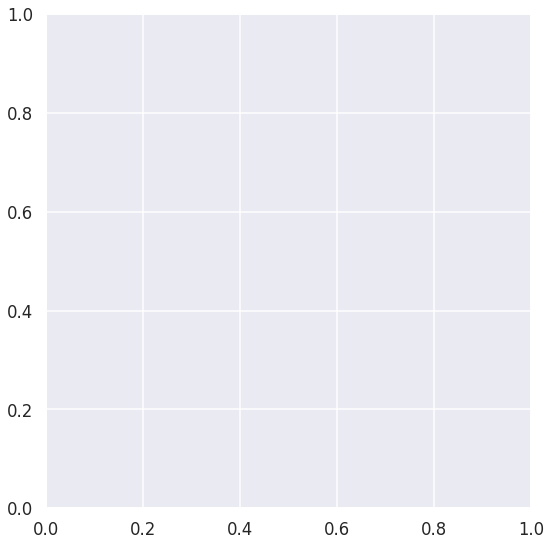

In [22]:
data = []
plt.figure(figsize=(40,20))
j=1
for feature in params:
  file = filedir + feature + '.csv'
  df = pd.read_csv(file)

  plt.subplot(2,4, j)
  j+=1
  
  df_gm =clean_dataframe(df.copy(), feature, 'final_mat_3')
  # df_wm = clean_dataframe(df.copy(), feature, 'final_mat_4')

  # ask if there is correlation between the feature value and age
  r, p = np.round(stats.pearsonr(df_gm['final_mat_3'], df_gm['final_mat_4']), decimals=5)

  # linear regression - feature changes across age
  legend_gm = "Correlation in {}: corr = {:.3f}, p = {:.1e} ".format(feature, r, p)
  sns.regplot(x=df_gm['final_mat_3'], y=df_gm['final_mat_4'])
  # y = np.abs(df_gm['final_mat_3'] - df_gm['final_mat_4'])
  # sns.histplot(y)

  plt.xlabel('WM')
  plt.ylabel('GM')
  plt.title(legend_gm)

plt.suptitle("Correlation White and Gray Matter")

### analysis WM/ GM

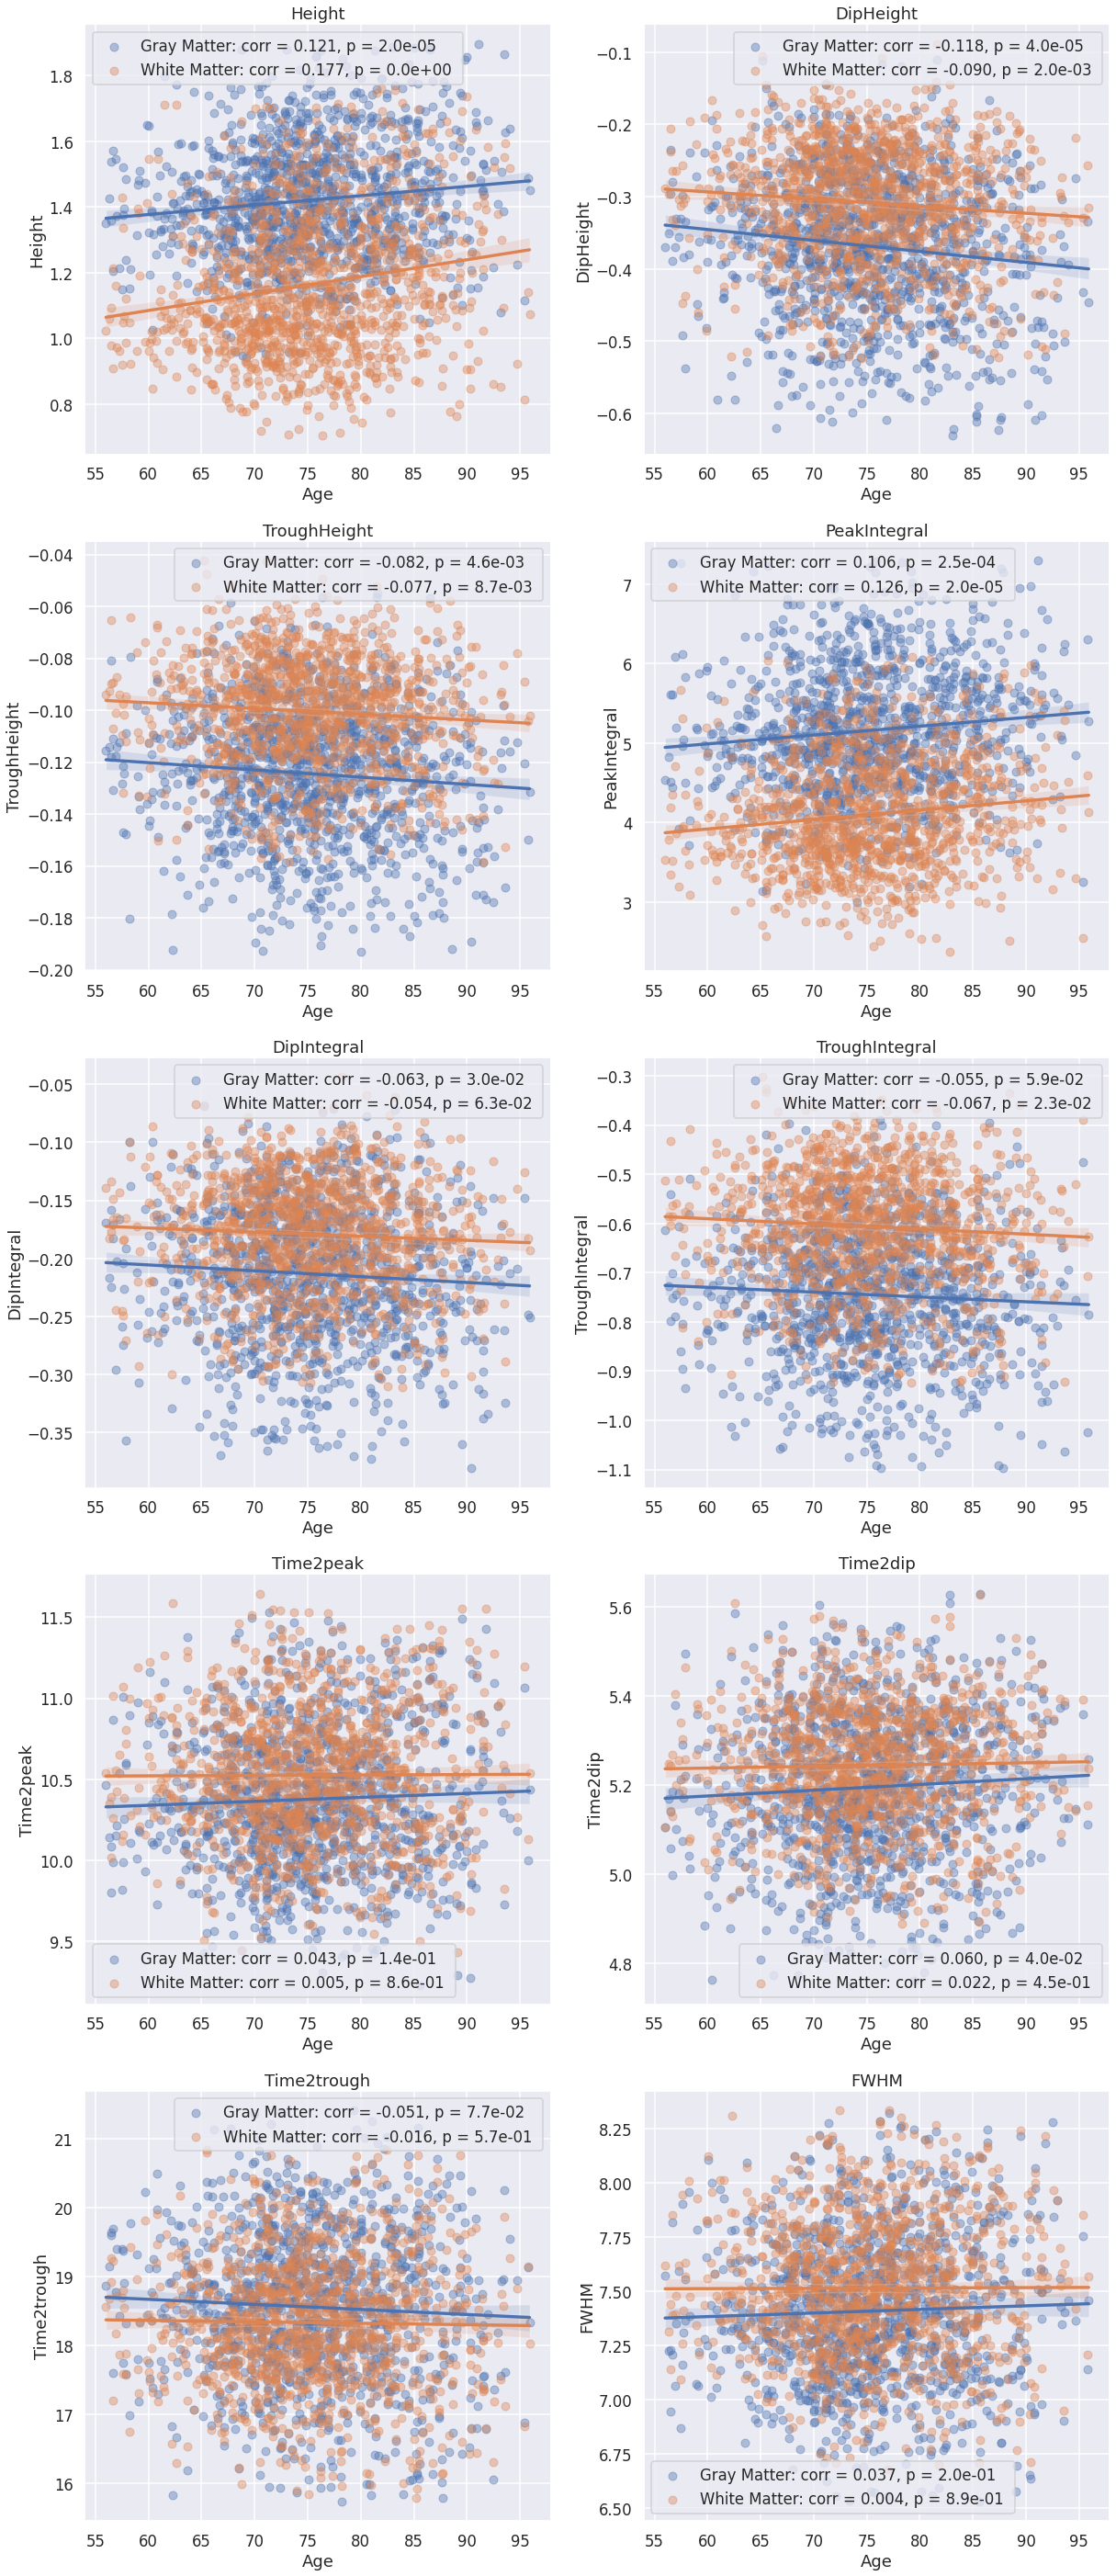

In [12]:
data = []
plt.figure(figsize=(20,50))
j=1
for feature in params:
  file = filedir + feature + '_cleaned.csv'
  df = pd.read_csv(file)

  df_gm, _ = clean_dataframe(df, 'GM')
  df_wm, _ = clean_dataframe(df, 'WM')
  # print(df_gm)
  plt.subplot(5,2, j)
  j+=1
  
  r_gm, p_gm = np.round(stats.pearsonr(df_gm['Age'], df_gm['GM']), decimals=5)
  r_wm, p_wm = np.round(stats.pearsonr(df_wm['Age'], df_wm['WM']), decimals=5)

  legend_gm = "Gray Matter: corr = {:.3f}, p = {:.1e} ".format(r_gm, p_gm)
  legend_wm = "White Matter: corr = {:.3f}, p = {:.1e} ".format(r_wm, p_wm)

  sns.regplot(x='Age', y='GM', data=df_gm,  scatter_kws={'alpha':0.4}, label=legend_gm)
  sns.regplot(x='Age', y='WM', data=df_wm,  scatter_kws={'alpha':0.4}, label=legend_wm)

  plt.legend()
  plt.xlabel('Age')
  plt.title(feature)
  plt.ylabel(feature)

# plt.suptitle("Feature Analysis in White and Gray Matter")

In [ ]:
data = []
plt.figure(figsize=(50,20))
j=1
for feature in params:
  file = filedir + feature + '_cleaned.csv'
  df = pd.read_csv(file)
  df['Sex'] = df['Sex'].map({'F': 1, 'M': 0})

  x1 = [56.3,1, 57]
  x2 = [91.3,0, 74]

  plt.subplot(2,5, j)
  j+=1

  ######## gray matter
  df_gm, _ =clean_dataframe(df.copy(), feature, 'GM')
  # mlr = LinearRegression()
  # mlr.fit(df_gm[['Age', 'Sex', 'Weight']], df_gm['GM'])

  # b0 = mlr.intercept_
  # beta_coeff = mlr.coef_

  # y1 = linear_model(b0, beta_coeff, x1)
  # y2 = linear_model(b0, beta_coeff, x2)
  # plt.plot([x1[0], x2[0]], [y1, y2], 'g')

  sns.regplot(x="Age", y='GM', data=df_gm, scatter_kws={'alpha':0.4}, color=pal[0],label="GM")
  
  ######## White Matter
  df_wm, _ =clean_dataframe(df.copy(), feature, 'WM')
  # mlr = LinearRegression()
  # mlr.fit(df_wm[['Age', 'Sex', 'Weight']], df_wm['WM'])

  # b0 = mlr.intercept_
  # beta_coeff = mlr.coef_

  # y1 = linear_model(b0, beta_coeff, x1)
  # y2 = linear_model(b0, beta_coeff, x2)

  # legend_wm = "White Matter"#: b0 = {:.3f}, b1 = {:.3f}, b2 = {:.3f}, b3 = {:.3f} ".format(b0, beta_coeff[0], beta_coeff[1], beta_coeff[2])
  # plt.plot([x1[0], x2[0]], [y1, y2], 'r')
  sns.regplot(x="Age", y='WM', data=df_wm, scatter_kws={'alpha':0.4}, color=pal[1],label="WM")

  plt.legend()



  plt.xlabel('Age')
  plt.title(feature)

plt.suptitle("Feature Analysis in White and Gray Matter")

## visualize HRF

In [2]:
import h5py
file = '/home/local/VANDERBILT/dolel/Documents/rsHRF_project/ADNI_23/VUIISXNAT04_S16966/VUIISXNAT04_E232335/rsfmri/Deconv_Detrend_4DVolume_hrf.mat'
f = h5py.File(file, 'r') # shape of 53 is better for visualization
data_mat = f.get('hrfa')
data_mat = np.array(data_mat)


In [3]:
pal = sns.color_palette("Paired")

In [9]:
sns.set_context('poster')

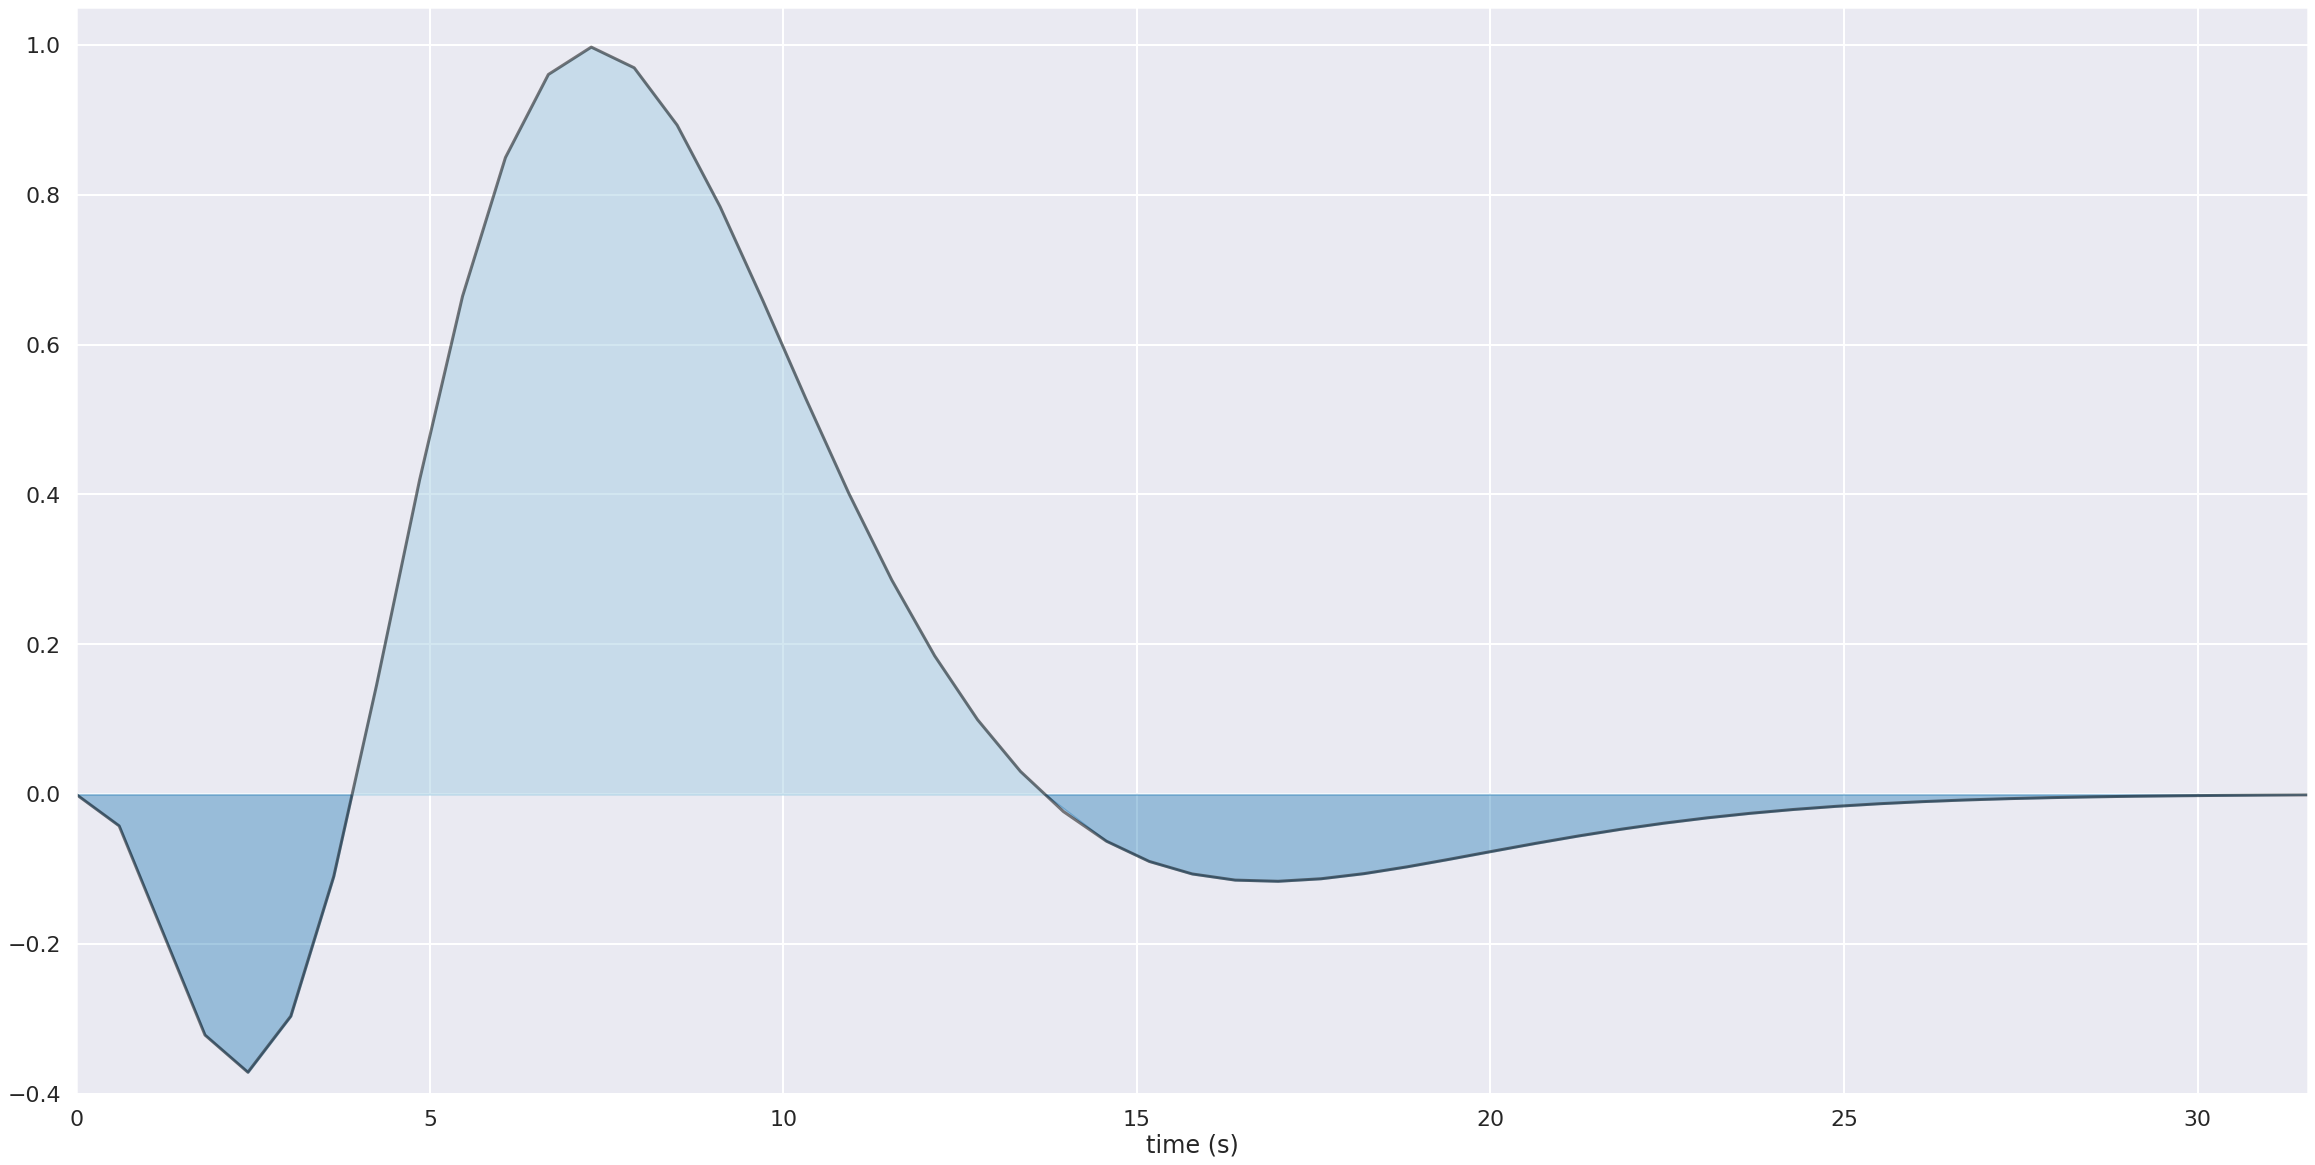

In [13]:
plt.figure(figsize=(40,20))
t = 0.607 * np.arange(53)
axis = np.zeros((53,1))
ax = sns.lineplot(x=t, y=data_mat[1500,:], color='black', alpha= 0.5) # a good HRF shape

# Get the two lines from the axes to generate shading
l1 = ax.lines[0]
# Get the xy data from the lines so that we can shade
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

#### DIP color
xdip = x1[0:8]
ydip = y1[0:8]
xdip[7]=3.9
ydip[7]=0

ax.fill_between(xdip,ydip, color=pal[1], alpha=0.4)

#### PEAK color
xpeak = x1[7:24]
ypeak = y1[7:24]
xpeak[23-7]=13.7
ypeak[23-7] =0

ax.fill_between(xpeak,ypeak, color=pal[0], alpha=0.5)


#### Trough color
xtrough = x1[23:-1]
ytrough = y1[23:-1]
xtrough[-1] = 31.56
ytrough[-1] =0

ax.fill_between(xtrough,ytrough,  color=pal[1], alpha=0.4)

plt.axis([0, t[-1], -0.4, 1.05])
plt.xlabel('time (s)')
plt.show(block=False)

In [9]:
x1

array([ 0.   ,  0.607,  1.214,  1.821,  2.428,  3.035,  3.642,  3.9  ,
        4.856,  5.463,  6.07 ,  6.677,  7.284,  7.891,  8.498,  9.105,
        9.712, 10.319, 10.926, 11.533, 12.14 , 12.747, 13.354, 13.7  ,
       14.568, 15.175, 15.782, 16.389, 16.996, 17.603, 18.21 , 18.817,
       19.424, 20.031, 20.638, 21.245, 21.852, 22.459, 23.066, 23.673,
       24.28 , 24.887, 25.494, 26.101, 26.708, 27.315, 27.922, 28.529,
       29.136, 29.743, 30.35 , 30.957, 31.564])

## Other

In [727]:
input_dir ='/home/local/VANDERBILT/dolel/Documents/rsHRF_project/ADNI_23/'
df = pd.read_csv('/home/local/VANDERBILT/dolel/Documents/rsHRF_project/idaSearch_3_26_2022_XNAT_addColumns.csv')

In [746]:
list_age = []
list_exp = []
list_subject = []
list_ResearchGroup = []
list_Sex = []
list_Weight = []
list_Phase = []

for subject in sorted(os.listdir(input_dir)):
    subject_dir = os.path.join(input_dir, subject)
    for experiment in sorted(os.listdir(subject_dir)):
        exp_dir = os.path.join(subject_dir, experiment)
        try:
            scz_fold = os.path.join(exp_dir, 'Scz_OUTPUTS')
            for filename in os.listdir(scz_fold):
                name, ext = os.path.splitext(filename)

                if ext == '.txt':
                    list_char = filename.split('-')

                    visit = list_char[4].split('_Visit')[1]
                    name = list_char[4].split('_Visit')[0]
                    sid = name.split('S_')[1]

                    df_sub_exp = df.loc[ (df['sID'] == int(sid)) & (df['vcode'] == float(visit))]
                    print(df_sub_exp['Age'])
                    list_subject.append(subject)
                    list_exp.append(experiment)
                    
                    try:
                        age = df_sub_exp['Age']
                        tmp = age.to_numpy()
                        list_age.append(tmp[0])
                        
                        Phase = df_sub_exp['Phase']
                        tmp = Phase.to_numpy()
                        list_Phase.append(tmp[0])

                        Weight = df_sub_exp['Weight']
                        tmp = Weight.to_numpy()
                        list_Weight.append(tmp[0])

                        Sex = df_sub_exp['Sex']
                        tmp = Sex.to_numpy()
                        list_Sex.append(tmp[0])


                        ResearchGroup = df_sub_exp['ResearchGroup']
                        tmp = ResearchGroup.to_numpy()
                        list_ResearchGroup.append(tmp[0])   

                    except:
                        print('FAIL')
                        list_age.append('NaN')
                        list_Phase.append('Nan')
                        list_Sex.append('Nan')
                        list_Weight.append('Nan')
                        list_ResearchGroup.append('Nan')

        except:
            pass
                

0    90.0
Name: Age, dtype: float64
1    91.0
Name: Age, dtype: float64
2    81.5
Name: Age, dtype: float64
6    87.5
Name: Age, dtype: float64
3    82.4
Name: Age, dtype: float64
4    83.4
Name: Age, dtype: float64
5    84.4
Name: Age, dtype: float64
7    89.7
Name: Age, dtype: float64
8    94.7
Name: Age, dtype: float64
9    95.8
Name: Age, dtype: float64
10    70.3
Name: Age, dtype: float64
11    71.3
Name: Age, dtype: float64
12    72.3
Name: Age, dtype: float64
13    63.0
Name: Age, dtype: float64
17    68.2
Name: Age, dtype: float64
14    64.0
Name: Age, dtype: float64
15    65.1
Name: Age, dtype: float64
16    66.1
Name: Age, dtype: float64
18    69.3
Name: Age, dtype: float64
19    70.3
Name: Age, dtype: float64
20    76.3
Name: Age, dtype: float64
21    77.3
Name: Age, dtype: float64
22    79.6
Name: Age, dtype: float64
23    81.2
Name: Age, dtype: float64
24    82.3
Name: Age, dtype: float64
25    83.4
Name: Age, dtype: float64
26    88.0
Name: Age, dtype: float64
27    75.9


In [747]:
print(len(list_age))


1449


In [748]:
df_out = pd.DataFrame(data={'subject':list_subject,
                        'experiment': list_exp,
                        'age': list_age,
                        'Study': list_Phase,
                        'Weight': list_Weight,
                        'Sex': list_Sex,
                        'ResearchGroup': list_ResearchGroup
                        })

output_file= '/home/local/VANDERBILT/dolel/Documents/rsHRF_project/list_params_subject_experiment_v3.csv'
df_out.to_csv(output_file, index=False)

In [745]:
df_out = pd.DataFrame(data={'subject':list_subject,
                        'experiment': list_exp,
                        'age': list_age })

output_file= '/home/local/VANDERBILT/dolel/Documents/rsHRF_project/list_age_subject_experiment.csv'
df_out.to_csv(output_file, index=False)

## Ants registration - test of combining transform

In [ ]:
folder='/home-nfs2/local/VANDERBILT/dolel/Documents/rsHRF_project/ADNI_23/VUIISXNAT04_S16964/VUIISXNAT04_E230873/'
fixed_MNI='/home/local/VANDERBILT/dolel/Documents/rsHRF_project/atlases/mni_icbm152_nlin_sym_09c/mni_icbm152_t1_tal_nlin_sym_09c.nii'
moving_struc=folder+ 'anat/I243898_MPRAGE_SENSE_20110708070427_301.nii.gz'
func='/home/local/VANDERBILT/dolel/Documents/rsHRF_project/ADNI_23/VUIISXNAT04_S16964/VUIISXNAT04_E230873/height_asym_registration/func2struct_Height.nii.gz'

In [ ]:
fixed = ants.image_read(fixed_MNI)
moving = ants.image_read(moving_struc)

# fixed.plot(overlay=moving, title='Before Registration')
mytx = ants.registration(fixed=fixed , moving=moving)
print(mytx)

redtx=ants.read_transform(mytx['fwdtransforms'][1])
mat = np.reshape(redtx.parameters, (3,4))
np.savetxt("/home/local/VANDERBILT/dolel/Documents/rsHRF_project/ADNI_23/VUIISXNAT04_S16964/VUIISXNAT04_E230873/struct2stand.mat", mat) 
matfile = np.loadtxt('/home/local/VANDERBILT/dolel/Documents/rsHRF_project/ADNI_23/VUIISXNAT04_S16964/VUIISXNAT04_E230873/epi_reg/mean_Detren_Volume4D_epi_reg.mat')

mat2 = ants.fsl2antstransform(matfile, f,m)

T1 = np.reshape(func2struct.parameters, (3,4))
R1 =T1[0:3,0:3]
t1=T1[:,3]

T2 = np.reshape(redtx.parameters, (3,4))
R2=T2[0:3,0:3]
t2=T2[:,3]

R1R2=np.matmul(R1,R2)
t3 = np.matmul(R1,t2) + t1

t3 = np.reshape(t3, (1,3))
T1T2 = np.concatenate((R1R2, t3.T), axis=1)
np.savetxt('../../matT1T2_func2stand.mat', T1T2)

func2struct=ants.image_read(func)
mywarpedimage = ants.apply_transforms(fixed=fixed, moving=func2struct, transformlist=mytx['fwdtransforms'])
output=folder+'test_registred_SyN_symmetrical_MNI.nii.gz'
ants.image_write(mywarpedimage, output)
